##### Understanding the Perceptron Step Function

This code is asking you to implement the `perceptron_step` function, which performs a single update step in the perceptron learning algorithm. Let me explain what's happening and how to correctly implement this function.

##### The Perceptron Algorithm

The perceptron is an algorithm for supervised learning of binary classifiers. It's a type of linear classifier that makes predictions based on a linear function of the inputs.

Here's how the perceptron algorithm works:
1. For each training example, calculate the predicted output using the current weights and bias
2. If the prediction is correct, do nothing
3. If the prediction is incorrect:
   - If the actual output is 1 but predicted 0, increase the weights and bias
   - If the actual output is 0 but predicted 1, decrease the weights and bias



Here's a Mermaid diagram illustrating the perceptron algorithm workflow:

```mermaid
flowchart TD
    A["Start Training"] --> B["Take Next Training Example (X, y)"]
    B --> C["Calculate Prediction: y_hat = step(W·X + b)"]
    C --> D{"Is Prediction Correct? y_hat == y"}
    
    D -->|"Yes"| E["No Weight Update Needed"]
    D -->|"No"| F{"What Type of Error?"}
    
    %% F -->|"Actual: 1, Predicted: 0"| G["Increase Weights and Bias: W = W + learn_rate * X b = b + learn_rate"]
    %% F -->|"Actual: 0, Predicted: 1"| H["Decrease Weights and Bias: W = W - learn_rate * X b = b - learn_rate"]
    F -->|"Actual: 1, Predicted: 0"| G["Increase Weights and Bias:<br>W = W + learn_rate * X<br>b = b + learn_rate"]
F -->|"Actual: 0, Predicted: 1"| H["Decrease Weights and Bias:<br>W = W - learn_rate * X<br>b = b - learn_rate"]
    
    E --> I{"More Training Examples?"}
    G --> I
    H --> I
    
    I -->|"Yes"| B
    I -->|"No"| J["End Training"]
    
    style A fill:#9AE4F5
    style B fill:#BCFB89
    style C fill:#FBF266
    style D fill:#FA756A
    style E fill:#0096D9
    style F fill:#FCEB14
    style G fill:#FE9237
    style H fill:#9AE4F5
    style I fill:#FBF266
    style J fill:#FA756A
```

This diagram shows:

1. The training process starts by taking a training example
2. The model calculates a prediction using current weights and bias
3. The prediction is compared to the actual label
4. If the prediction is correct, no update is needed
5. If incorrect, the weights are updated based on the type of error:
   - For false negatives (actual=1, predicted=0): increase weights and bias
   - For false positives (actual=0, predicted=1): decrease weights and bias
6. The process repeats for all training examples
7. Multiple passes (epochs) may be needed for the model to converge

The colored nodes represent different stages of the algorithm, helping to visualize the distinct steps in the perceptron learning process.

##### Understanding the Code Components

Let's analyze the provided code:

1. `step_function(t)`: This is the activation function that outputs 1 if the input is non-negative, and 0 otherwise.

2. `prediction(X, W, b)`: This function:
   - Takes a data point X, weights W, and bias b
   - Calculates the dot product X·W + b
   - Passes the result through the step function
   - Returns the predicted class (0 or 1)

3. `perceptron_step(X, y, W, b, learn_rate = 0.01)`: This function should:
   - Process the entire dataset X with labels y
   - Update weights W and bias b according to the perceptron algorithm
   - Return the updated weights and bias

##### The Test Case

Looking at the test case:
- X_test contains 4 data points: [1,1], [1,-1], [-1,1], and [-1,-1]
- y_test contains the corresponding labels: 1, 1, 0, 0
- W_test is the initial weights: [0.5, 0.5]
- b_test is the initial bias: 0.5
- learn_rate is set to 0.01

The expected outcome is:
- W becomes [0.51, 0.49]
- b becomes 0.49

##### Implementing the Perceptron Step

To correctly implement the `perceptron_step` function, we need to:

1. For each data point, calculate the prediction
2. Compare the prediction with the actual label
3. Update the weights and bias accordingly

Here's how we should implement it:

```python
def perceptron_step(X, y, W, b, learn_rate = 0.01):
    """
    The function should receive as inputs the data X, the labels y, the
    weights W (as an array), and the bias b, update the weights and bias
    W, b, according to the perceptron algorithm, and return W and b.
    """
    for i in range(len(X)):
        # Calculate the prediction
        y_hat = prediction(X[i:i+1], W, b)
        
        # Update weights and bias when prediction is wrong
        if y[i] - y_hat == 1:  # Actual=1, Predicted=0
            # Increase weights and bias
            W[0][0] += X[i][0] * learn_rate
            W[1][0] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - y_hat == -1:  # Actual=0, Predicted=1
            # Decrease weights and bias
            W[0][0] -= X[i][0] * learn_rate
            W[1][0] -= X[i][1] * learn_rate
            b -= learn_rate
            
    return W, b
```

##### Tracing Through the Example

Let's trace through the execution with the test data to verify our implementation:

Starting with:
- X = [[1,1], [1,-1], [-1,1], [-1,-1]]
- y = [1, 1, 0, 0]
- W = [[0.5], [0.5]]
- b = 0.5
- learn_rate = 0.01

For the first data point [1,1]:
- Prediction: step_function((1×0.5 + 1×0.5 + 0.5)) = step_function(1.5) = 1
- Actual label: 1
- Prediction is correct, so no update

For the second data point [1,-1]:
- Prediction: step_function((1×0.5 + (-1)×0.5 + 0.5)) = step_function(0.5) = 1
- Actual label: 1
- Prediction is correct, so no update

For the third data point [-1,1]:
- Prediction: step_function(((-1)×0.5 + 1×0.5 + 0.5)) = step_function(0.5) = 1
- Actual label: 0
- Prediction is incorrect (predicted 1 but actual is 0)
- Update: 
  - W[0][0] = 0.5 - (-1)×0.01 = 0.5 + 0.01 = 0.51
  - W[1][0] = 0.5 - 1×0.01 = 0.5 - 0.01 = 0.49
  - b = 0.5 - 0.01 = 0.49

For the fourth data point [-1,-1]:
- Prediction: step_function(((-1)×0.51 + (-1)×0.49 + 0.49)) = step_function(-0.51) = 0
- Actual label: 0
- Prediction is correct, so no update

Final values:
- W = [[0.51], [0.49]]
- b = 0.49

This matches the expected output, confirming our implementation is correct.

##### Key Insights

1. The perceptron algorithm adjusts the weights and bias in the direction that reduces the error for each misclassified point.

2. The learning rate controls how much the weights and bias change with each update. A smaller learning rate means smaller steps and potentially more stable convergence, but might require more iterations.

3. In geometrical terms, the weights and bias define a decision boundary (a line in 2D). The perceptron algorithm moves this boundary until it correctly separates the two classes (if they are linearly separable).

4. This implementation processes all examples and then returns the updated weights. In a full training loop, you would typically call this function repeatedly until convergence or for a fixed number of epochs.

This perceptron implementation forms the foundation for more complex neural networks and deep learning models. While simple, it contains the essential elements of forward propagation (prediction) and weight updating based on error.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

np.random.seed(42)

def step_function(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return step_function((np.matmul(X,W)+b)[0])

def perceptron_step(X, y, W, b, learn_rate = 0.01):
    """
    The function should receive as inputs the data X, the labels y, the
    weights W (as an array), and the bias b, update the weights and bias
    W, b, according to the perceptron algorithm, and return W and b.
    """
    for i in range(len(X)):
        # Calculate the prediction
        # X[i:i+1] returns: A row vector (2D array shape: (1, n_features))
        # If X is a (100,3) matrix of 100 samples with 3 features:
        # X[i:i+1].shape   # → (1, 3)  (2D)
        # X[i].shape       # → (3,)    (1D)
        y_hat = prediction(X[i:i+1], W, b)
        
        # Update weights and bias when prediction is wrong
        if y[i] - y_hat == 1:  # Actual=1, Predicted=0
            # Increase weights and bias
            W[0][0] += X[i][0] * learn_rate
            W[1][0] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - y_hat == -1:  # Actual=0, Predicted=1
            # Decrease weights and bias
            W[0][0] -= X[i][0] * learn_rate
            W[1][0] -= X[i][1] * learn_rate
            b -= learn_rate
            
    return W, b
    
X_test = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
y_test = np.array([1,1,0,0])
W_test = np.array([[0.5], [0.5]])
b_test = 0.5

output_W, output_b = perceptron_step(
    X_test,
    y_test,
    W_test,
    b_test,
    0.01
)
solution_W = np.array([[ 0.51],[ 0.49]])
solution_b = 0.49
if np.array_equal(output_W, solution_W) and output_b == solution_b:
    print("Nice work coding the perceptron algorithm!")
else:
    print("Try again. For perceptron_step(\n{}, \n{}, \n{}, \n{}, \
\n{}\n)\nthe expected result was \nW=\n{}\nand b={}, but your output \
was \nW=\n{}\nand b={}".format(
        X_test,
        y_test,
        W_test,
        b_test,
        0.01,
        solution_W,
        solution_b,
        output_W,
        output_b
    ))

Nice work coding the perceptron algorithm!


When you are done implementing the algorithm and the cell above prints "Nice work coding the perceptron algorithm!" go ahead and run the cell below, which will repeatedly run your `perceptron_step` function and plot the solution below.

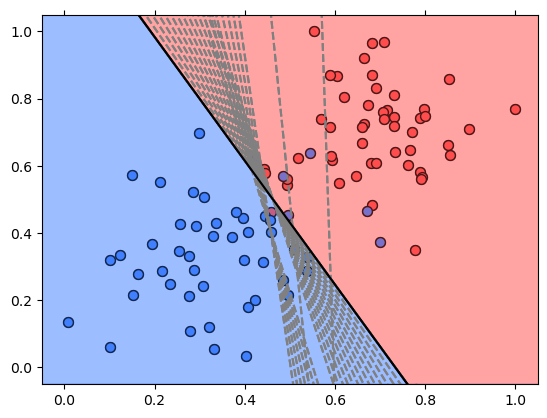

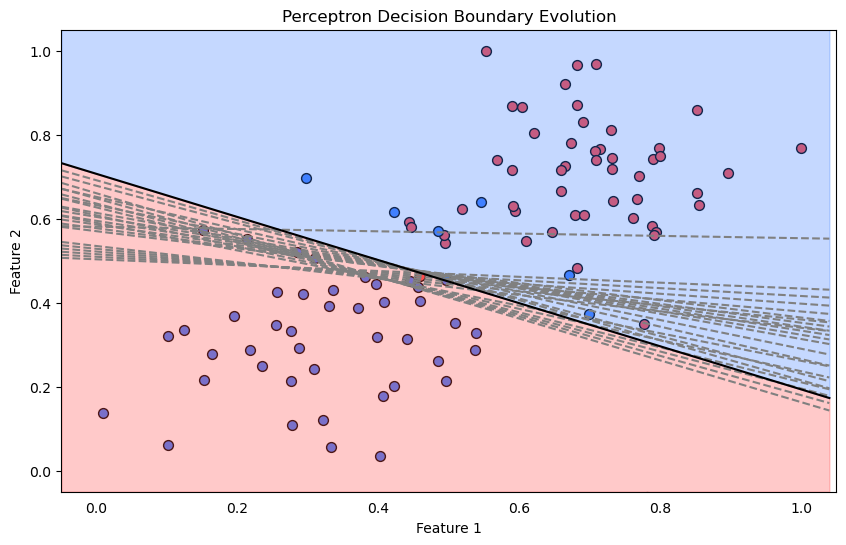

In [6]:
def train_perceptron_algorithm(X, y, learn_rate=0.01, num_epochs=25):
    """
    This function runs the perceptron algorithm repeatedly on the dataset,
    and returns a few of the boundary lines obtained in the iterations,
    for plotting purposes.
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptron_step(X, y, W, b, learn_rate)
        # Calculate the slope and intercept of the boundary line
        # The boundary line is where W·X + b = 0, which can be rewritten as:
        # x2 = (-W[0]/W[1])*x1 + (-b/W[1])
        # So slope = -W[0]/W[1] and intercept = -b/W[1]
        boundary_lines.append((-W[0][0]/W[1][0], -b/W[1][0]))
    return boundary_lines

def plot_line(m, b, linestyle='dashed', color='gray', fill=False, red_color=[1,0.3,0.3], blue_color=[0.25,0.5,1]):
    """
    Helper function to avoid repetitive code when plotting boundary lines
    """
    x = np.arange(-0.05, 1.05, 0.01)  # Adjusted to match the plot limits
    plt.plot(x, m*x+b, linestyle=linestyle, color=color)
    if fill:
        # Fill areas above and below the line
        plt.fill_between(x, m*x+b, -0.05, color=red_color, alpha=0.3)
        plt.fill_between(x, m*x+b, 1.05, color=blue_color, alpha=0.3)
        
# Load data
data = np.asarray(pd.read_csv("data.csv", header=None))
X = data[:,0:2]
y = data[:,2]

# Define colors for plotting
red = [1,0.3,0.3]
blue = [0.25,0.5,1]

# Get list of boundary lines
# Feel free to play with the learning rate and the num_epochs, and see
# your results plotted below
boundary_lines = train_perceptron_algorithm(X, y)

# Create a figure with appropriate size
plt.figure(figsize=(10, 6))

# Set up plot styling
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom=False, top=False)

# Plot data points
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

# Plot boundary lines and solution regions
for i, line in enumerate(boundary_lines):
    if i < len(boundary_lines) - 1:  # Only plot intermediate lines as dashed
        slope = line[0]
        intercept = line[1]
        plot_line(slope, intercept)

# Plot the final solution line as solid black with filled regions
solution_slope = boundary_lines[-1][0]
solution_intercept = boundary_lines[-1][1]
plot_line(solution_slope, solution_intercept, 'solid', 'k', True, red, blue)

plt.title('Perceptron Decision Boundary Evolution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()